# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
os.listdir("../data")

['Fitbit2.csv', 'titanic.csv', 'vehicles.csv']

In [3]:
fitbit = pd.read_csv("../data/Fitbit2.csv")

In [4]:
fitbit.sample(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
351,2016-04-22,3328,12963,9.66,10,404.000,436,14,10,202,...,6.002444,Friday,4.0,1,7.166667,87.398374,5.683333,92.663043,April,4
62,2015-07-09,2994,7298,5.42,6,836.000,290,10,1,1322,...,3.367831,Thursday,3.0,1,9.166667,92.592593,5.183333,93.393393,July,7
114,2015-08-30,2961,11924,8.91,64,1.421,0,0,0,0,...,5.536416,Sunday,6.0,0,5.433333,96.165192,6.250000,84.080717,August,8


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

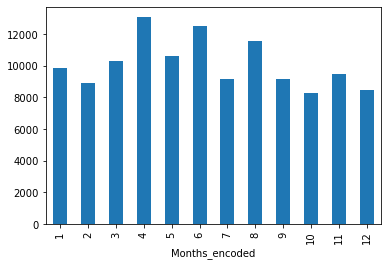

In [5]:
# AVERAGE STEPS BY MONTH_ENCODED
step_month_avg = fitbit.groupby(["Months_encoded"])["Steps"].mean().plot(kind ="bar")

<AxesSubplot:xlabel='Months_encoded'>

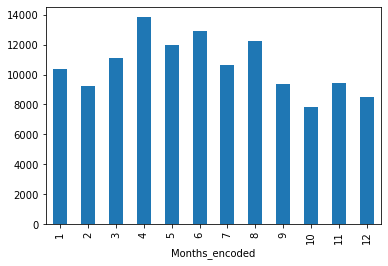

In [6]:
fitbit.groupby(["Months_encoded"])["Steps"].median().plot(kind ="bar")

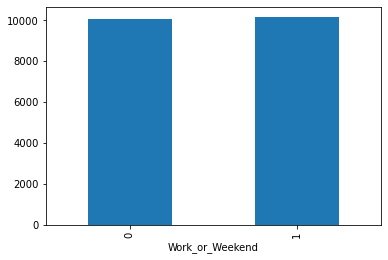

In [7]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# titanic.groupby(["sex", "class"])["age"].mean()
fitbit.groupby(["Work_or_Weekend"])["Steps"].mean()
work_week_avg = fitbit.groupby(["Work_or_Weekend"])["Steps"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Work_or_Weekend'>

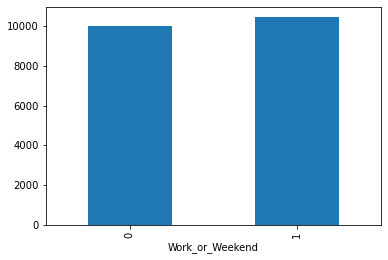

In [8]:
fitbit.groupby(["Work_or_Weekend"])["Steps"].median().plot(kind="bar")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

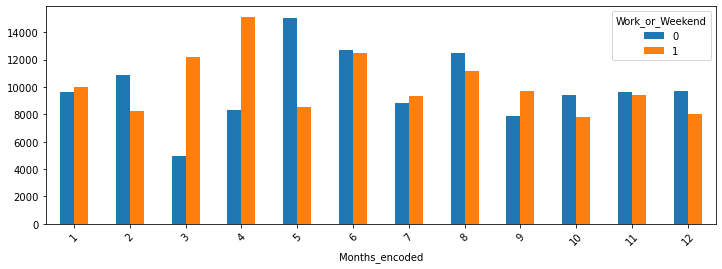

In [9]:
stepsavg = fitbit.groupby(["Months_encoded","Work_or_Weekend"])["Steps"].mean().unstack().plot(kind ="bar",figsize=(12,4))
plt.xticks(rotation = 45)


In [10]:
#scatter = sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins, hue="species"e);
#scatter.figure.savefig("../images/scatter.jpg", dpi=1000)

stepsavg.figure.savefig("setpsavg", dpi = 1000)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [11]:
fitbit.corr().sample(2)
"""
#sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins);
sns.scatterplot(x= "Minutes Lightly Active", y = "Steps", data = fitbit)
sns.scatterplot(x= "Minutes Very Active", y = "Steps", data = fitbit)
sns.scatterplot(x= "Minutes Sedentary", y = "Steps", data = fitbit)

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", ax=axs[0])
"""

'\n#sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins);\nsns.scatterplot(x= "Minutes Lightly Active", y = "Steps", data = fitbit)\nsns.scatterplot(x= "Minutes Very Active", y = "Steps", data = fitbit)\nsns.scatterplot(x= "Minutes Sedentary", y = "Steps", data = fitbit)\n\nsns.histplot(data=penguins, x="flipper_length_mm", hue="species", ax=axs[0])\n'

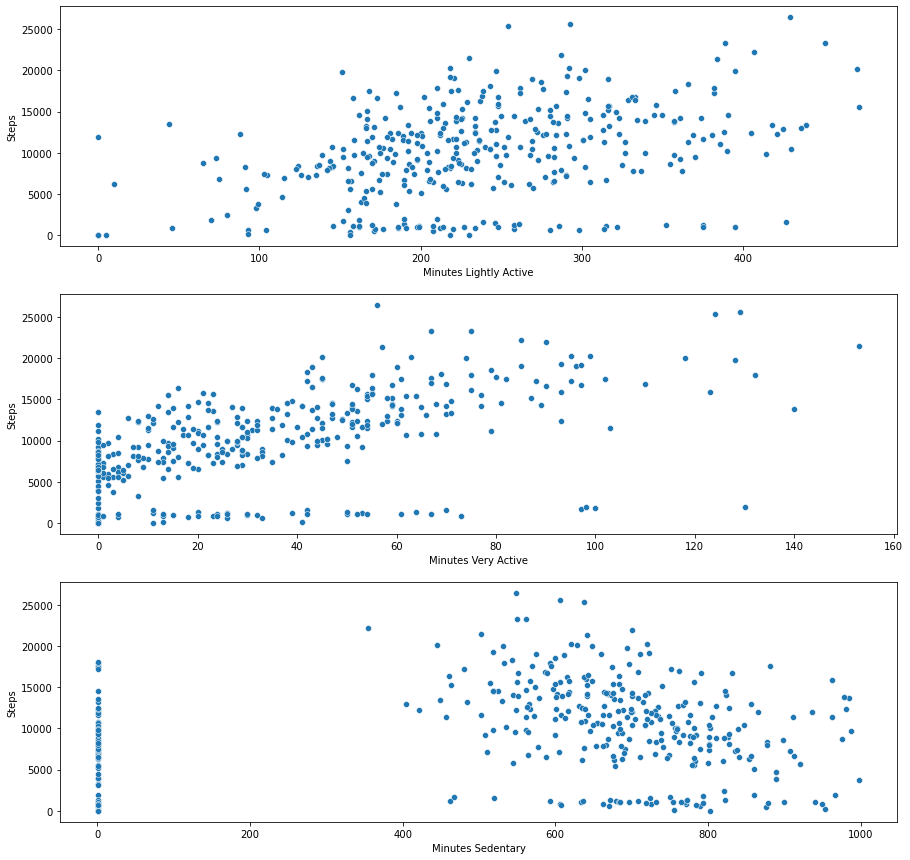

In [12]:

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

collist = ["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"]

ran = len(collist) #funciona si nrows es el mismo de columnas (o ncol si lascolumnas es 1)
df = fitbit
a = 0
correlative = "Steps" #para poder incluir cualquier columna

for a in range(ran):
    sns.scatterplot(data = df, x= collist[a], y = correlative, ax = axs[a])
    a += 1



In [13]:
#aving figure
fig.figure.savefig("axes", dpi = 1000)

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [14]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
689,690,1.0,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
144,145,0.0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,U0,S
278,279,0.0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,U0,Q


#### Explore the titanic dataset using Pandas dtypes.

In [15]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [16]:
# NUMERICAL VARIABLES
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
titanic.select_dtypes(include=numerics)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [17]:
# CATEGORICAL VARIABLES
cate = ['object','category']
titanic.select_dtypes(include=cate)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [59]:
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

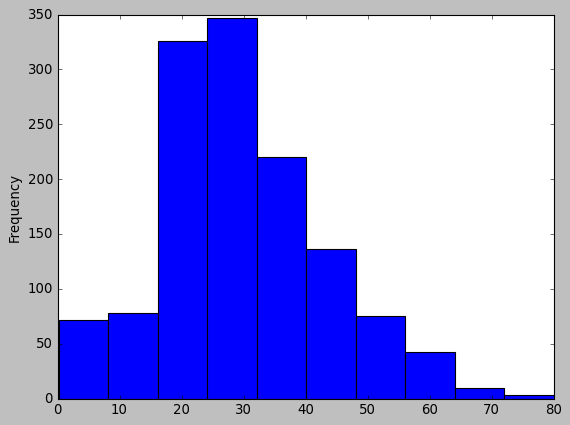

In [19]:
titanic.Age.plot.hist();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:ylabel='Frequency'>

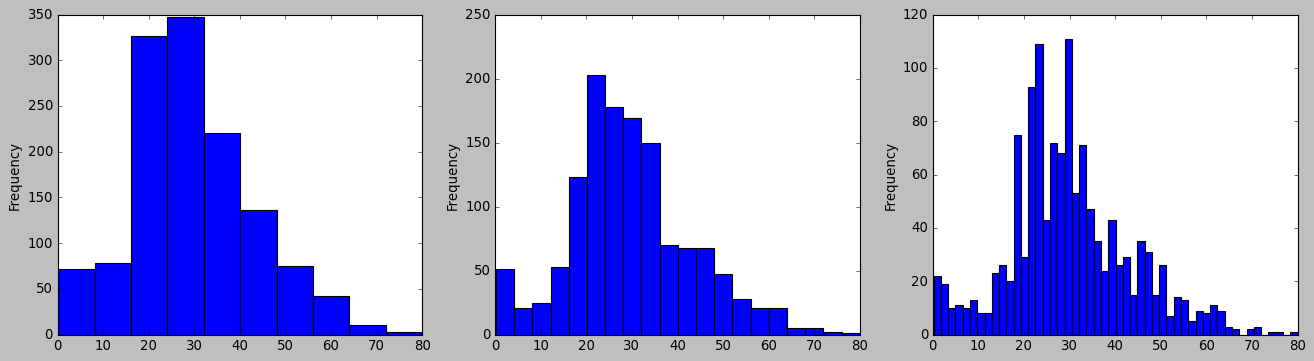

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
titanic.Age.plot.hist(bins=10, ax = axs[0]) 
titanic.Age.plot.hist(bins=20, ax = axs[1])
titanic.Age.plot.hist(bins=50, ax = axs[2]) 

#### How does the bin size affect your plot?

In [21]:
"""
the more bins you set, the more bars are shown.
"""

'\nthe more bins you set, the more bars are shown.\n'

#### Use seaborn to show the distribution of column `Age`.

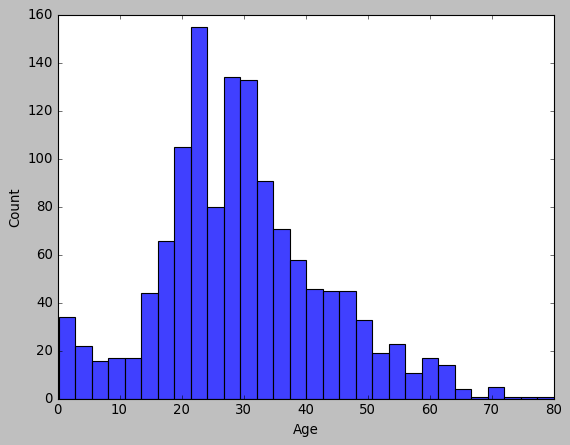

In [22]:
sns.histplot(x=titanic.Age);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:>

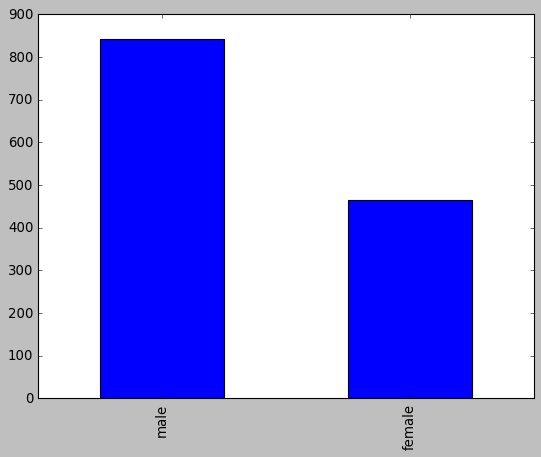

In [23]:
# Method 1 - matplotlib
titanic["Gender"].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='Gender', ylabel='count'>

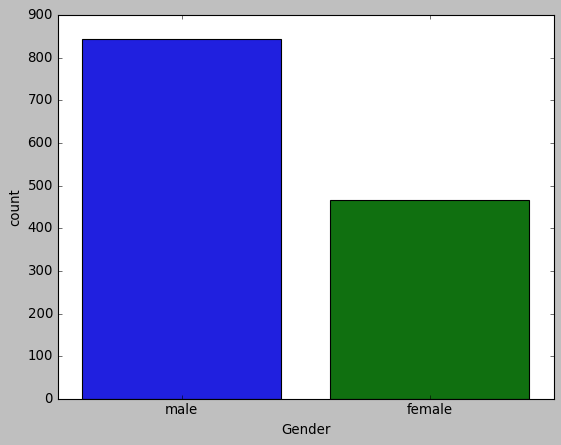

In [24]:
# Method 2 - seaborn
sns.countplot(x=titanic.Gender)

#### Use the right plot to visualize the column `Pclass`.

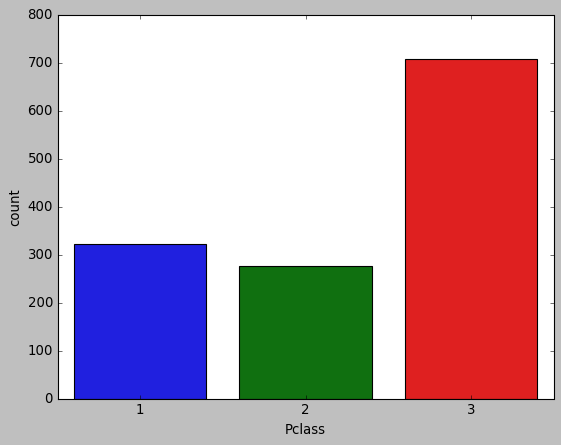

In [25]:
sns.countplot(x=titanic.Pclass);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

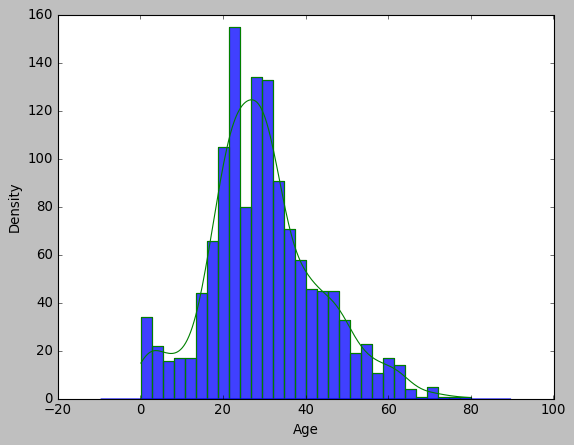

In [26]:
sns.kdeplot(x=titanic.Age)
sns.histplot(data=titanic, x="Age")
sns.histplot(x=titanic.Age,fill=None, kde=True);

In [27]:
"""
sns.histplot is the best plot that sumarizes statistics of the feature `Age`
"""

'\nsns.histplot is the best plot that sumarizes statistics of the feature `Age`\n'

#### What does the last plot tell you about the feature `Age`?

In [28]:
"""
most of the passengers were between 18 and 30.
"""

'\nmost of the passengers were between 18 and 30.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

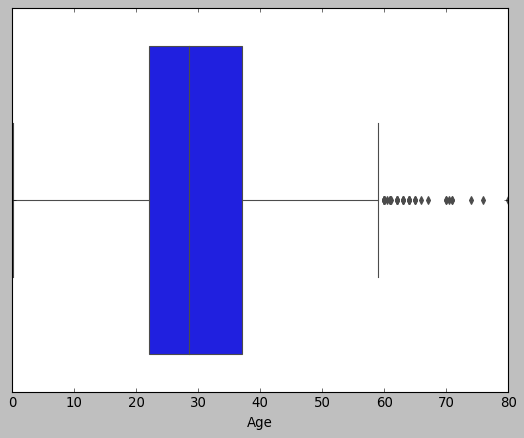

In [37]:
sns.boxplot(x="Age", data=titanic)

#### What additional information does the last plot provide about feature `Age`?

In [38]:
"""
the distribution of the plot featuring Age shows that most of the passengsers were between 20 and 40, been the median age: 28

"""

'\nthe distribution of the plot featuring Age shows that most of the passengsers were between 20 and 40, been the median age: 28\n\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

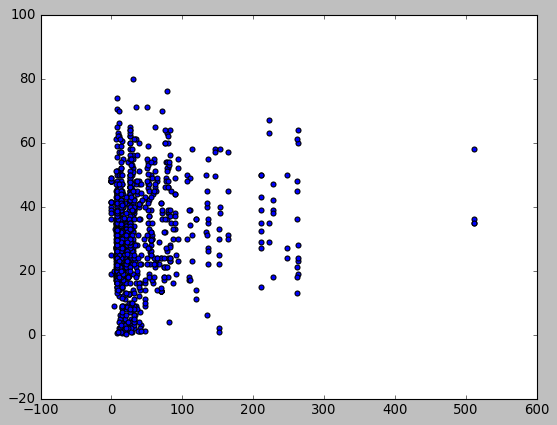

In [42]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Fare, y=titanic.Age);

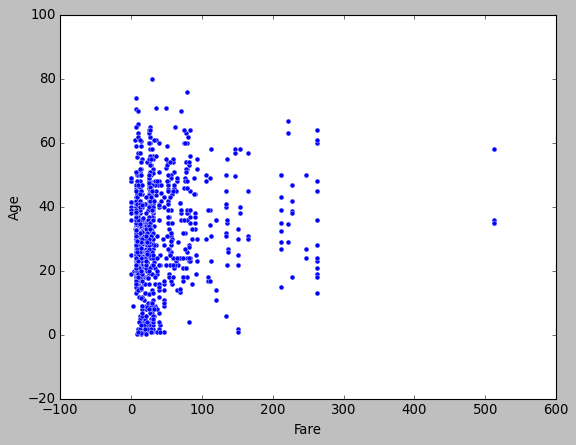

In [39]:
# Method 2 - seaborn
sns.scatterplot(x="Fare", y="Age", data=titanic);

#### Plot the correlation matrix using seaborn.

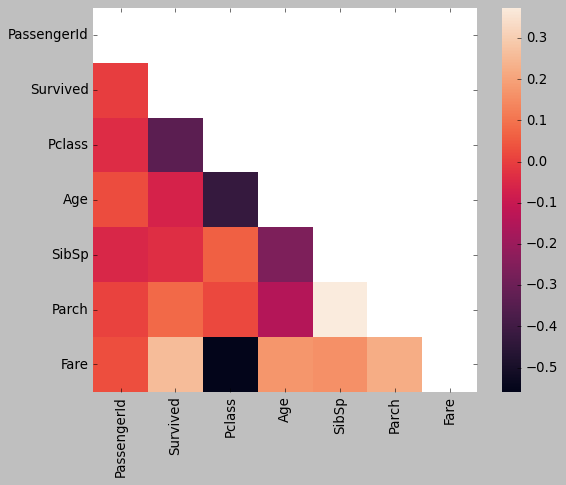

In [74]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) #mascara de Ras

sns.heatmap(corr, mask = mascara, square=True);

#### What are the most correlated features?

In [45]:
"""
Fare / Pclass
Age/ Pclass
"""

'\nFare \n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

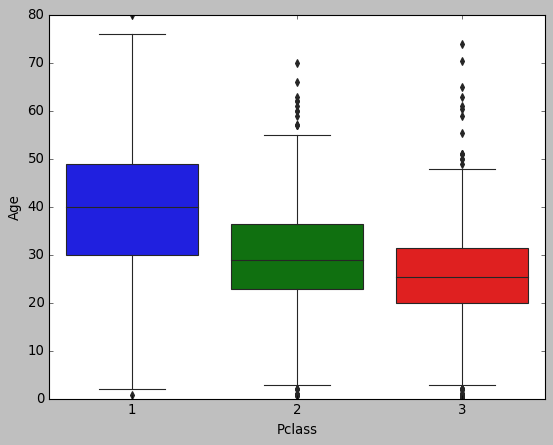

In [72]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

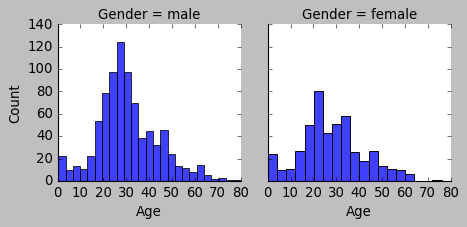

In [73]:
grid = sns.FacetGrid(titanic, col="Gender",)
grid.map(sns.histplot, "Age")